# Spotify Audio Analysis
Explanation of Variables [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)

In [1]:
dat = read.csv('labeled_data.csv')
attach(dat)

In [2]:
summary(dat)
names(dat)

  danceability        energy             key            loudness      
 Min.   :0.1610   Min.   :0.00613   Min.   : 0.000   Min.   :-38.027  
 1st Qu.:0.4915   1st Qu.:0.50875   1st Qu.: 2.000   1st Qu.: -8.133  
 Median :0.5885   Median :0.65400   Median : 5.000   Median : -6.543  
 Mean   :0.5816   Mean   :0.62171   Mean   : 5.157   Mean   : -7.108  
 3rd Qu.:0.6763   3rd Qu.:0.78150   3rd Qu.: 9.000   3rd Qu.: -5.198  
 Max.   :0.9640   Max.   :0.96100   Max.   :11.000   Max.   : -2.114  
                                                                      
      mode         speechiness       acousticness      instrumentalness   
 Min.   :0.0000   Min.   :0.02360   Min.   :0.000101   Min.   :0.0000000  
 1st Qu.:0.0000   1st Qu.:0.03350   1st Qu.:0.028350   1st Qu.:0.0000000  
 Median :1.0000   Median :0.04315   Median :0.116000   Median :0.0000036  
 Mean   :0.7033   Mean   :0.07526   Mean   :0.255530   Mean   :0.0234949  
 3rd Qu.:1.0000   3rd Qu.:0.06703   3rd Qu.:0.397750   3r

[1] "danceability"     "energy"           "key"              "loudness"        
 [5] "mode"             "speechiness"      "acousticness"     "instrumentalness"
 [9] "liveness"         "valence"          "tempo"            "uri"             
[13] "duration_ms"      "time_signature"   "class"

In [3]:
# I left the uri in there so you can copy and paste it into the Spotify search bar and listen to
# some funky fresh tunes :)
dat[1:5,1:8]
dat[1:5,9:15]

danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness
0.572,0.532,0,-6.844,1,0.0316,0.214,0.00e+00
0.565,0.437,6,-7.680,0,0.0403,0.194,7.14e-06
0.587,0.525,9,-9.257,0,0.1980,0.099,2.50e-04
0.443,0.157,7,-12.818,1,0.0382,0.757,0.00e+00
0.537,0.890,5,-5.191,1,0.0488,0.117,2.05e-05


liveness,valence,tempo,uri,duration_ms,time_signature,class
0.2840,0.607,76.033,spotify:track:6rZwsNzGS7nq8qILqdM9kX,252267,4,good
0.0656,0.217,96.132,spotify:track:5P3yUXUC9rZPJPNmYGKEAz,236733,3,good
0.5570,0.323,90.356,spotify:track:3ZGrUoFhNCWmm6sbFAuktX,241320,4,good
0.1130,0.401,139.953,spotify:track:4JuYMhZk1SfhImtaHO3Sh6,194680,3,good
0.2790,0.597,114.088,spotify:track:2Zd9awmsA8KuF65snhz7YH,231387,4,good


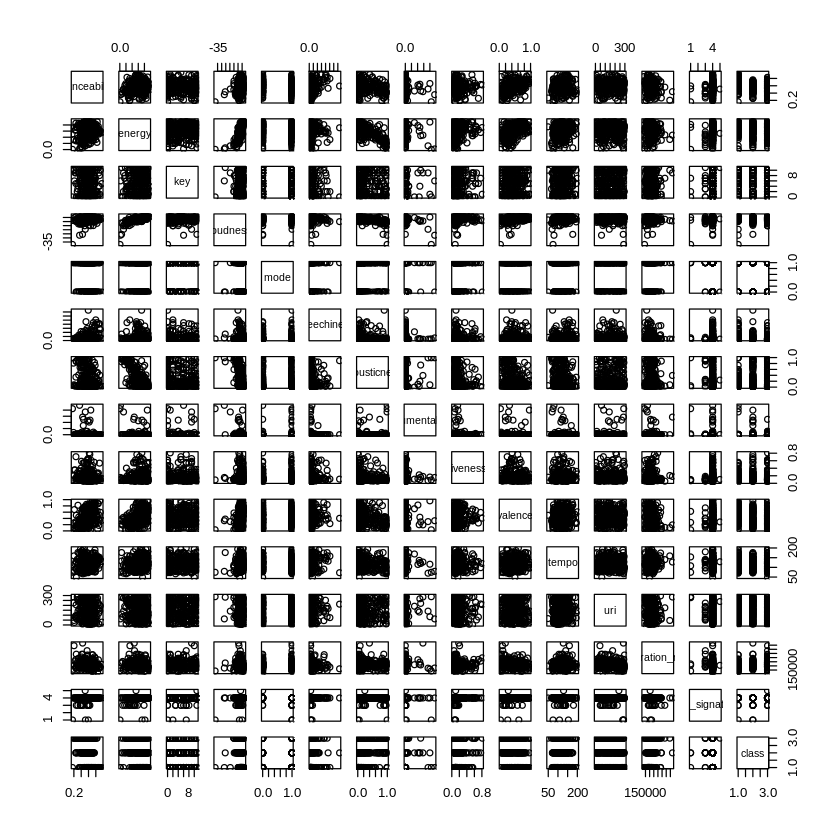

In [4]:
pairs(dat)

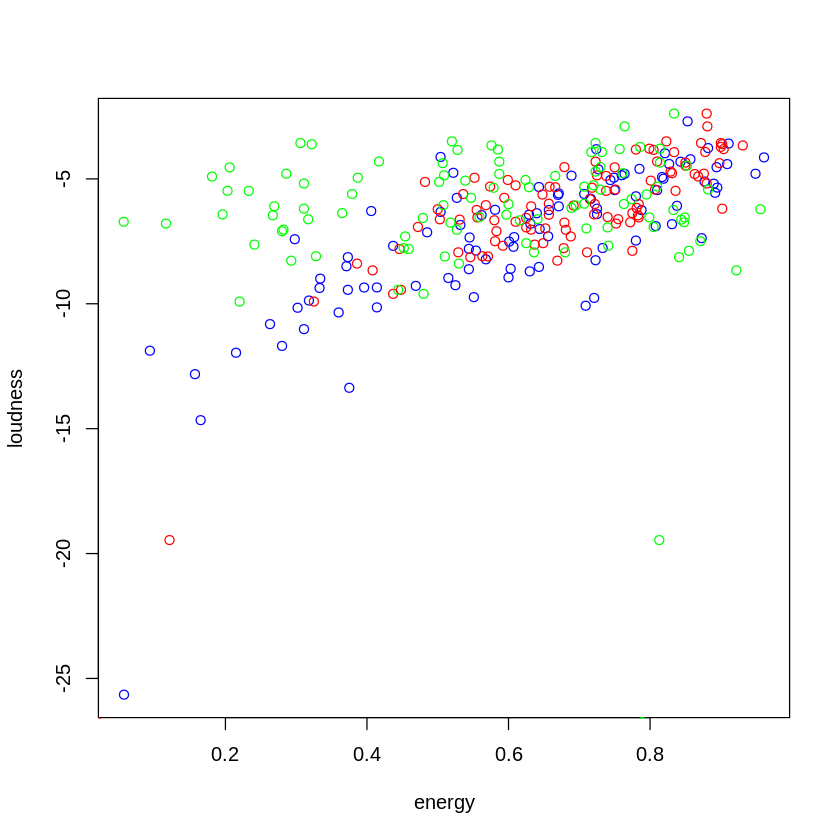

In [5]:
#looks like loudness and energy positively correlate!
plot(energy[1:100], loudness[1:100], col='blue', xlab="energy", ylab="loudness") #good
points(energy[101:200], loudness[101:200], col='red') #bad
points(energy[201:300], loudness[101:200], col='green') #ok

Let's just work with binary classes for now (good and bad):

In [22]:
new_dat = dat[1:200,]
okay_dat = dat[201:300,]

In [7]:
names(new_dat)

[1] "danceability"     "energy"           "key"              "loudness"        
 [5] "mode"             "speechiness"      "acousticness"     "instrumentalness"
 [9] "liveness"         "valence"          "tempo"            "uri"             
[13] "duration_ms"      "time_signature"   "class"

In [8]:
logModelA = glm(class~danceability+energy+key+loudness+mode+speechiness+acousticness+instrumentalness+liveness+valence+tempo+duration_ms+time_signature,
                data=new_dat, family='binomial')

In [9]:
logModelA


Call:  glm(formula = class ~ danceability + energy + key + loudness + 
    mode + speechiness + acousticness + instrumentalness + liveness + 
    valence + tempo + duration_ms + time_signature, family = "binomial", 
    data = new_dat)

Coefficients:
     (Intercept)      danceability            energy               key  
       3.381e+00        -5.006e+00        -5.302e-01        -5.999e-02  
        loudness              mode       speechiness      acousticness  
       1.704e-01        -5.492e-01         3.882e-01         2.363e+00  
instrumentalness          liveness           valence             tempo  
       7.387e-01         7.032e-01        -6.836e-01         8.531e-04  
     duration_ms    time_signature  
       1.457e-05        -4.255e-01  

Degrees of Freedom: 199 Total (i.e. Null);  186 Residual
Null Deviance:	    277.3 
Residual Deviance: 227.4 	AIC: 255.4

In [33]:
logModel.probs = predict(logModelA, okay_dat, type='response')
logModel.preds=rep('bad', dim(okay_dat)[1])

logModel.preds[logModel.probs>.75]='good'
logModel.preds[logModel.probs<.75]='okay'
logModel.preds[logModel.probs<.25]='bad'

In [34]:
logModel.preds

[1] "good" "okay" "okay" "good" "okay" "good" "good" "okay" "okay" "good"
 [11] "okay" "good" "good" "good" "okay" "good" "good" "good" "bad"  "okay"
 [21] "okay" "good" "okay" "okay" "good" "bad"  "good" "bad"  "good" "okay"
 [31] "okay" "okay" "good" "okay" "bad"  "good" "good" "okay" "good" "okay"
 [41] "okay" "good" "okay" "okay" "okay" "good" "okay" "good" "okay" "bad" 
 [51] "okay" "okay" "okay" "okay" "okay" "okay" "good" "okay" "okay" "okay"
 [61] "good" "good" "good" "okay" "okay" "good" "okay" "okay" "good" "good"
 [71] "okay" "okay" "good" "good" "good" "okay" "okay" "okay" "okay" "good"
 [81] "bad"  "okay" "okay" "okay" "good" "okay" "okay" "okay" "good" "good"
 [91] "good" "okay" "okay" "bad"  "bad"  "okay" "bad"  "okay" "good" "good"

In [37]:
okay_dat$class = logModel.preds

In [54]:
#wasn't sure how to only print out the URI and class..
okay_dat[,(12:15)]

,uri,duration_ms,time_signature,class
201,spotify:track:42lKCQOl2TQpB4HTjKDpQ7,209147,4,good
202,spotify:track:4S7BYX9wxfprr3OSZMozxL,223082,4,okay
203,spotify:track:6Np3Ntxmj4yl9y3eVB7Esr,157373,4,okay
204,spotify:track:30AeH6saju8WPJo73cKZyH,213937,4,good
205,spotify:track:577Jd6UW9FUqUF6StozHkl,261867,4,okay
206,spotify:track:28Apu5sWHoaZoeMCAWK2V1,284770,4,good
207,spotify:track:7g4aRiQH7AN07x1Y2eCIuh,232242,4,good
208,spotify:track:0p9E7l00TBA1aqmhElZoLx,240547,4,okay
209,spotify:track:0oPDrdHQwkjaT0aytZavUO,236773,4,okay
210,spotify:track:61IsztUa3EPy7L0VyfUCAg,257973,4,good


# THIS IS ACTUALLY SO EXCITING WOW IF I WEREN'T IN PUBLIC I'D PROBABLY BE SCREAMING OR SOMETHING

The goal of this project is to be able to input a Spotify URI and then classify the song as ```good```, ```okay```, or ```bad``` based on it's audio features. I want to make this super-app-y at a Hackathon that I'm going to this weekend (sorry going to miss class on Monday :( ) but THIS IS REALLY EXCITING.

There were some Spotify API logic things that I need to handle--one call to recieve song features has a limit of 100 songs, so I need to find ways to handle that--which is why there's only 100 of each category right now. I wanted to throw something together really quick but I'll be doing more in depth analysis later on.

I didn't actually train my model on my 'okay' classes, but instead used that as my 'testing set'. The way I classified my songs:

I generally get tired of playing the same songs over and over again, so I usually create Spotify playlists by date (i.e: ```1/31/18 - 3/25/18```, ```3/25/18 - 5/25/18```, ...)  

__Good__ songs are songs that were able to make it through at least two playlists. So if I didn't get tired of a song by the time I created my next time period playlist, I classified that as a good song.

__Okay__ songs did not make it through to a next time period. I got tired of the song by the end of the ~2 months.

__Bad__ songs are mostly just the hit country songs that I found on a random playlist on Spoot (tbh I didn't even listen to it). Also EDM.

Going in and plugging in the songs that were classified as bad, I found that this those songs were pretty outlier-ish. Fitz and the Tantrum does lean towards dance-y electronic-y music, so it makes sense that it was classified as bad. Songs that were classified as good, I thought to myself, 'Oh! I did really like this song a while ago' or something like that. 

I am concerned that this project is a little too opinion-based and I that I will have really bad confirmation bias--maybe this model is utter trash, but I keep telling myself that this is really awesome, but IT IS.